### Import libraries

In [1]:
import pprint
import json

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

### Installing and importing tensorflow_docs 
`pip install git+https://github.com/tensorflow/docs`

In [2]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [3]:
keras.__version__

'2.5.0'

### Loading dataset
#### Medical Cost Personal Datasets
Source: https://www.kaggle.com/mirichoi0218/insurance

Datafields:

* age: age of primary beneficiary 

* sex: insurance contractor gender (female, male)

* bmi: Body mass index, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking (yes, no)

* region: the beneficiary's residential area in the US (northeast, southeast, southwest, northwest)

* charges: Individual medical costs billed by health insurance

In [4]:
data = pd.read_csv('datasets/insurance.csv')

data.sample(10)

,age,sex,bmi,children,smoker,region,charges
421,61,male,35.860,0,yes,southeast,46599.10840
799,33,male,24.795,0,yes,northeast,17904.52705
109,63,male,35.090,0,yes,southeast,47055.53210
624,59,male,28.785,0,no,northwest,12129.61415
1083,32,male,31.500,1,no,southwest,4076.49700
591,47,male,19.570,1,no,northwest,8428.06930
439,26,male,29.450,0,no,northeast,2897.32350
376,39,female,24.890,3,yes,northeast,21659.93010
842,23,female,32.780,2,yes,southeast,36021.01120
479,23,male,32.560,0,no,southeast,1824.28540


In [5]:
data.shape

(1338, 7)

In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data[['age', 'bmi', 'charges']].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [8]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### Visualizing Dataset

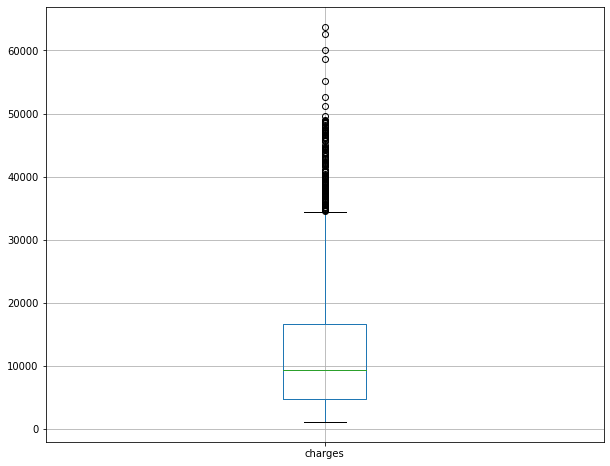

In [11]:
plt.figure(figsize=(10, 8))

data.boxplot('charges')

plt.show()

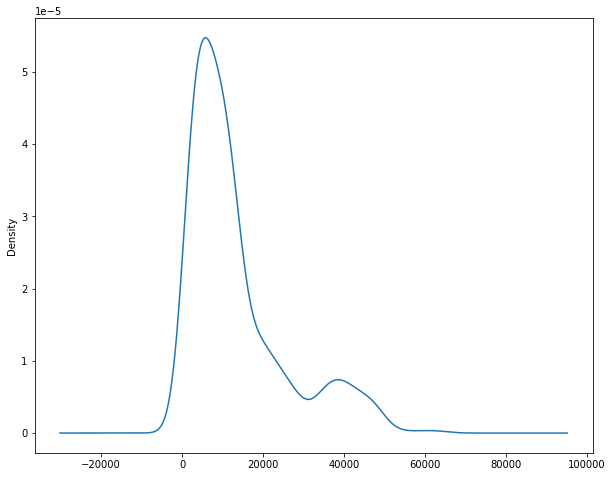

In [12]:
plt.figure(figsize=(10, 8))

data['charges'].plot.kde()

plt.show()

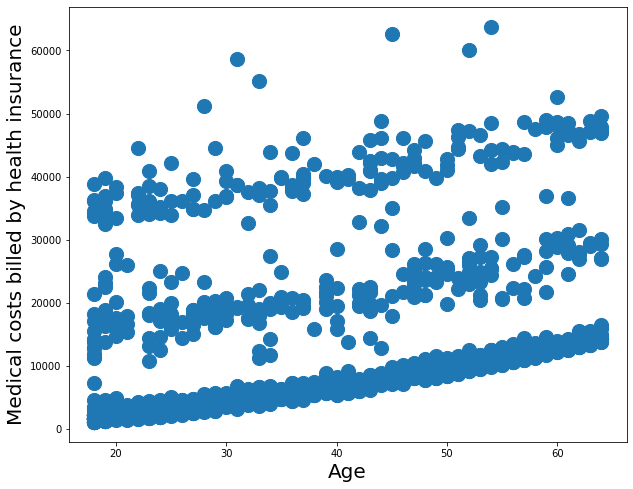

In [13]:
plt.figure(figsize=(10, 8))

plt.scatter(data['age'], data['charges'], s=200)

plt.xlabel('Age', fontsize=20)
plt.ylabel('Medical costs billed by health insurance', fontsize=20)
plt.show()

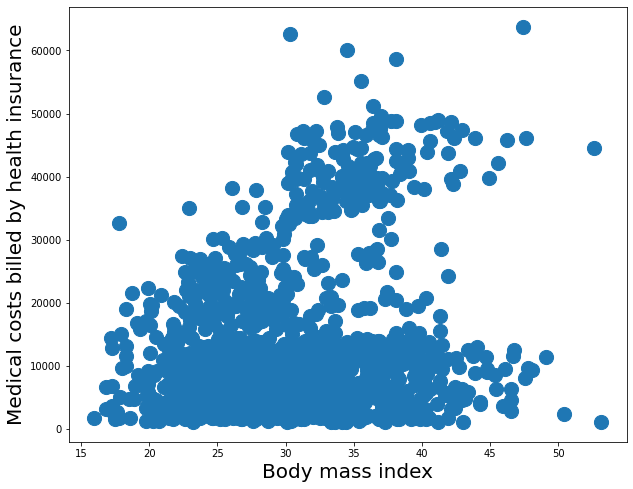

In [14]:
plt.figure(figsize=(10, 8))

plt.scatter(data['bmi'], data['charges'], s=200)

plt.xlabel('Body mass index', fontsize=20)
plt.ylabel('Medical costs billed by health insurance', fontsize=20)
plt.show()

In [15]:
data_corr = data.corr()

data_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


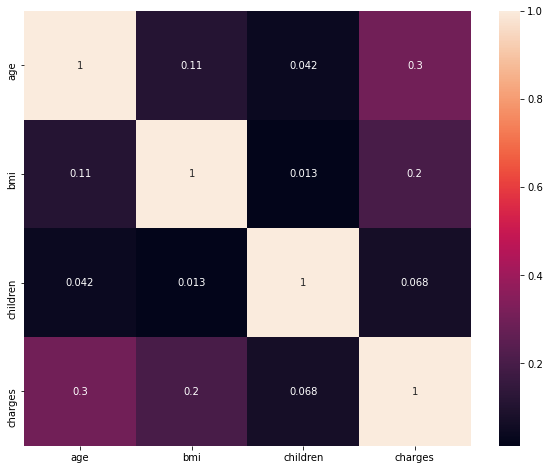

In [16]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(data_corr, annot=True)

plt.show()

In [17]:
features = data.drop('charges', axis=1)

target = data[['charges']]

In [18]:
features.sample(10)

,age,sex,bmi,children,smoker,region
926,19,female,23.400,2,no,southwest
556,46,male,33.440,1,no,northeast
169,27,male,18.905,3,no,northeast
1166,57,male,40.370,0,no,southeast
539,53,male,31.350,0,no,southeast
344,49,female,41.470,4,no,southeast
352,30,female,27.700,0,no,southwest
1016,19,female,24.605,1,no,northwest
544,54,male,30.210,0,no,northwest
5,31,female,25.740,0,no,southeast


In [19]:
target.sample(10)

,charges
448,5910.94400
247,1986.93340
752,14210.53595
702,9504.31030
1117,36124.57370
1291,34828.65400
385,1261.85900
704,8930.93455
1060,1981.58190
96,12105.32000


In [20]:
categorical_features = features[['sex', 'smoker', 'region']].copy()

categorical_features.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [21]:
numeric_features = features.drop(['sex', 'smoker', 'region'], axis=1)

numeric_features.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [22]:
gender_dict = {'female':0, 'male':1}

categorical_features['sex'].replace(gender_dict, inplace=True)

categorical_features.head()

,sex,smoker,region
0,0,yes,southwest
1,1,no,southeast
2,1,no,southeast
3,1,no,northwest
4,1,no,northwest


In [23]:
smoker_dict = {'no':0, 'yes':1}

categorical_features['smoker'].replace(smoker_dict, inplace=True)

categorical_features.head()

,sex,smoker,region
0,0,1,southwest
1,1,0,southeast
2,1,0,southeast
3,1,0,northwest
4,1,0,northwest


In [24]:
categorical_features = pd.get_dummies(categorical_features, columns=['region'])

categorical_features.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,0,1
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0


In [25]:
numeric_features.describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


In [26]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features), 
                                columns=numeric_features.columns,
                                index=numeric_features.index)

numeric_features.describe()

,age,bmi,children
count,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.805565e-16,-2.124194e-16,-5.576008e-17
std,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-2.412011e+00,-9.086137e-01
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02
75%,8.396738e-01,6.611572e-01,7.510793e-01
max,1.765289e+00,3.685522e+00,3.240619e+00


In [27]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1,
                               sort=False)

processed_features.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,1,0,0,1,0,0


In [28]:
processed_features.shape

(1338, 9)

In [29]:
target.head(10)

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
6,8240.58960
7,7281.50560
8,6406.41070
9,28923.13692


In [30]:
processed_data = pd.concat([processed_features, target], axis=1,
                            sort=False)

processed_data.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,0,1,0,0,0,1,16884.92400
1,-1.509965,0.509621,-0.078767,1,0,0,0,1,0,1725.55230
2,-0.797954,0.383307,1.580926,1,0,0,0,1,0,4449.46200
3,-0.441948,-1.305531,-0.908614,1,0,0,1,0,0,21984.47061
4,-0.513149,-0.292556,-0.908614,1,0,0,1,0,0,3866.85520


In [31]:
processed_data.to_csv('datasets/insurance_processed.csv', index=False)

### Splitting dataset into training and testing data

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state=1)

In [33]:
x_train.shape

(1070, 9)

In [34]:
x_test.shape

(268, 9)

### Building model with relu activation function

In [36]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[len(x_train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [37]:
model_relu_64 = build_model()

model_relu_64.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [39]:
keras.utils.plot_model(model_relu_64, 'model_relu_64.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [40]:
keras.utils.plot_model(model_relu_64, 'model_relu_64_shapes.png', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [41]:
!ls *.png

ls: cannot access '*.png': No such file or directory


### Training model

In [42]:
n_epochs = 1000

training_hist = model_relu_64.fit(x_train, 
                                  y_train,
                                  epochs = n_epochs, 
                                  validation_split = 0.2, 
                                  verbose = True)

Epoch 1/1000
27/27 [==============================] - 2s 21ms/step - loss: 317064384.0000 - mae: 13317.8916 - mse: 317064384.0000 - val_loss: 336114080.0000 - val_mae: 12877.2266 - val_mse: 336114080.0000
Epoch 2/1000
27/27 [==============================] - 0s 4ms/step - loss: 317022464.0000 - mae: 13316.3672 - mse: 317022464.0000 - val_loss: 336054176.0000 - val_mae: 12875.1172 - val_mse: 336054176.0000
Epoch 3/1000
27/27 [==============================] - 0s 4ms/step - loss: 316931328.0000 - mae: 13313.1426 - mse: 316931328.0000 - val_loss: 335917760.0000 - val_mae: 12870.4365 - val_mse: 335917760.0000
Epoch 4/1000
27/27 [==============================] - 0s 4ms/step - loss: 316733664.0000 - mae: 13306.4355 - mse: 316733664.0000 - val_loss: 335643264.0000 - val_mae: 12861.2129 - val_mse: 335643264.0000
Epoch 5/1000
27/27 [==============================] - 0s 4ms/step - loss: 316359904.0000 - mae: 13293.8994 - mse: 316359904.0000 - val_loss: 335141696.0000 - val_mae: 12844.6729 - val

27/27 [==============================] - 0s 3ms/step - loss: 63905176.0000 - mae: 6219.2290 - mse: 63905176.0000 - val_loss: 73714752.0000 - val_mae: 6745.1904 - val_mse: 73714752.0000
Epoch 83/1000
27/27 [==============================] - 0s 3ms/step - loss: 63276112.0000 - mae: 6191.3501 - mse: 63276112.0000 - val_loss: 72937272.0000 - val_mae: 6724.7222 - val_mse: 72937272.0000
Epoch 84/1000
27/27 [==============================] - 0s 3ms/step - loss: 62571892.0000 - mae: 6140.3135 - mse: 62571892.0000 - val_loss: 72102136.0000 - val_mae: 6667.0098 - val_mse: 72102136.0000
Epoch 85/1000
27/27 [==============================] - 0s 3ms/step - loss: 61914060.0000 - mae: 6112.4937 - mse: 61914060.0000 - val_loss: 71299576.0000 - val_mae: 6629.8076 - val_mse: 71299576.0000
Epoch 86/1000
27/27 [==============================] - 0s 3ms/step - loss: 61233940.0000 - mae: 6070.9492 - mse: 61233940.0000 - val_loss: 70477256.0000 - val_mae: 6587.5723 - val_mse: 70477256.0000
Epoch 87/1000
27/27

Epoch 123/1000
27/27 [==============================] - 0s 4ms/step - loss: 41721764.0000 - mae: 4970.0566 - mse: 41721764.0000 - val_loss: 44865416.0000 - val_mae: 5063.4932 - val_mse: 44865416.0000
Epoch 124/1000
27/27 [==============================] - 0s 3ms/step - loss: 41399132.0000 - mae: 4936.4653 - mse: 41399132.0000 - val_loss: 44403988.0000 - val_mae: 5031.6069 - val_mse: 44403988.0000
Epoch 125/1000
27/27 [==============================] - 0s 3ms/step - loss: 41105480.0000 - mae: 4916.6470 - mse: 41105480.0000 - val_loss: 43976444.0000 - val_mae: 4985.7139 - val_mse: 43976444.0000
Epoch 126/1000
27/27 [==============================] - 0s 3ms/step - loss: 40816932.0000 - mae: 4897.4321 - mse: 40816932.0000 - val_loss: 43514676.0000 - val_mae: 4963.2954 - val_mse: 43514676.0000
Epoch 127/1000
27/27 [==============================] - 0s 3ms/step - loss: 40533256.0000 - mae: 4868.2769 - mse: 40533256.0000 - val_loss: 43067728.0000 - val_mae: 4923.1426 - val_mse: 43067728.0000


Epoch 164/1000
27/27 [==============================] - 0s 3ms/step - loss: 36328456.0000 - mae: 4265.1899 - mse: 36328456.0000 - val_loss: 35272848.0000 - val_mae: 4062.5764 - val_mse: 35272848.0000
Epoch 165/1000
27/27 [==============================] - 0s 4ms/step - loss: 36307156.0000 - mae: 4257.2295 - mse: 36307156.0000 - val_loss: 35160588.0000 - val_mae: 4052.2832 - val_mse: 35160588.0000
Epoch 166/1000
27/27 [==============================] - 0s 3ms/step - loss: 36267564.0000 - mae: 4257.9414 - mse: 36267564.0000 - val_loss: 35060468.0000 - val_mae: 4035.5928 - val_mse: 35060468.0000
Epoch 167/1000
27/27 [==============================] - 0s 3ms/step - loss: 36242816.0000 - mae: 4227.5571 - mse: 36242816.0000 - val_loss: 35043456.0000 - val_mae: 4015.6711 - val_mse: 35043456.0000
Epoch 168/1000
27/27 [==============================] - 0s 3ms/step - loss: 36197456.0000 - mae: 4223.8657 - mse: 36197456.0000 - val_loss: 34947320.0000 - val_mae: 4014.9744 - val_mse: 34947320.0000


Epoch 205/1000
27/27 [==============================] - 0s 3ms/step - loss: 35382560.0000 - mae: 4075.7310 - mse: 35382560.0000 - val_loss: 33423736.0000 - val_mae: 3845.6797 - val_mse: 33423736.0000
Epoch 206/1000
27/27 [==============================] - 0s 3ms/step - loss: 35355676.0000 - mae: 4080.4390 - mse: 35355676.0000 - val_loss: 33380450.0000 - val_mae: 3840.5884 - val_mse: 33380450.0000
Epoch 207/1000
27/27 [==============================] - 0s 4ms/step - loss: 35346072.0000 - mae: 4084.5857 - mse: 35346072.0000 - val_loss: 33356936.0000 - val_mae: 3848.6013 - val_mse: 33356936.0000
Epoch 208/1000
27/27 [==============================] - 0s 3ms/step - loss: 35326788.0000 - mae: 4077.7283 - mse: 35326788.0000 - val_loss: 33373834.0000 - val_mae: 3837.0312 - val_mse: 33373834.0000
Epoch 209/1000
27/27 [==============================] - 0s 3ms/step - loss: 35295844.0000 - mae: 4067.1204 - mse: 35295844.0000 - val_loss: 33329432.0000 - val_mae: 3828.4019 - val_mse: 33329432.0000


27/27 [==============================] - 0s 13ms/step - loss: 33251898.0000 - mae: 3894.5952 - mse: 33251898.0000 - val_loss: 31334880.0000 - val_mae: 3678.2109 - val_mse: 31334880.0000
Epoch 287/1000
27/27 [==============================] - 0s 4ms/step - loss: 33212680.0000 - mae: 3874.3362 - mse: 33212680.0000 - val_loss: 31316460.0000 - val_mae: 3660.7227 - val_mse: 31316460.0000
Epoch 288/1000
27/27 [==============================] - 0s 3ms/step - loss: 33181542.0000 - mae: 3874.5312 - mse: 33181542.0000 - val_loss: 31284468.0000 - val_mae: 3662.8972 - val_mse: 31284468.0000
Epoch 289/1000
27/27 [==============================] - 0s 13ms/step - loss: 33144380.0000 - mae: 3871.2798 - mse: 33144380.0000 - val_loss: 31257212.0000 - val_mae: 3659.3574 - val_mse: 31257212.0000
Epoch 290/1000
27/27 [==============================] - 0s 5ms/step - loss: 33116098.0000 - mae: 3861.0105 - mse: 33116098.0000 - val_loss: 31250978.0000 - val_mae: 3652.0012 - val_mse: 31250978.0000
Epoch 291/100

27/27 [==============================] - 0s 3ms/step - loss: 31769184.0000 - mae: 3711.3030 - mse: 31769184.0000 - val_loss: 30335820.0000 - val_mae: 3546.4985 - val_mse: 30335820.0000
Epoch 328/1000
27/27 [==============================] - 0s 3ms/step - loss: 31710534.0000 - mae: 3709.7129 - mse: 31710534.0000 - val_loss: 30324368.0000 - val_mae: 3546.9343 - val_mse: 30324368.0000
Epoch 329/1000
27/27 [==============================] - 0s 3ms/step - loss: 31680590.0000 - mae: 3717.7246 - mse: 31680590.0000 - val_loss: 30273714.0000 - val_mae: 3555.5669 - val_mse: 30273714.0000
Epoch 330/1000
27/27 [==============================] - 0s 3ms/step - loss: 31629968.0000 - mae: 3711.9663 - mse: 31629968.0000 - val_loss: 30259370.0000 - val_mae: 3545.6091 - val_mse: 30259370.0000
Epoch 331/1000
27/27 [==============================] - 0s 4ms/step - loss: 31595638.0000 - mae: 3701.6597 - mse: 31595638.0000 - val_loss: 30226154.0000 - val_mae: 3540.5027 - val_mse: 30226154.0000
Epoch 332/1000


27/27 [==============================] - 0s 5ms/step - loss: 30058670.0000 - mae: 3529.2668 - mse: 30058670.0000 - val_loss: 29216070.0000 - val_mae: 3391.7190 - val_mse: 29216070.0000
Epoch 369/1000
27/27 [==============================] - 0s 3ms/step - loss: 30011148.0000 - mae: 3540.4751 - mse: 30011148.0000 - val_loss: 29189892.0000 - val_mae: 3404.6042 - val_mse: 29189892.0000
Epoch 370/1000
27/27 [==============================] - 0s 6ms/step - loss: 29959924.0000 - mae: 3532.7952 - mse: 29959924.0000 - val_loss: 29157872.0000 - val_mae: 3392.1326 - val_mse: 29157872.0000
Epoch 371/1000
27/27 [==============================] - 0s 4ms/step - loss: 29926496.0000 - mae: 3524.8323 - mse: 29926496.0000 - val_loss: 29145834.0000 - val_mae: 3384.8511 - val_mse: 29145834.0000
Epoch 372/1000
27/27 [==============================] - 0s 4ms/step - loss: 29874470.0000 - mae: 3517.1936 - mse: 29874470.0000 - val_loss: 29103100.0000 - val_mae: 3380.0740 - val_mse: 29103100.0000
Epoch 373/1000


27/27 [==============================] - 0s 5ms/step - loss: 28331248.0000 - mae: 3380.2705 - mse: 28331248.0000 - val_loss: 28093152.0000 - val_mae: 3256.2393 - val_mse: 28093152.0000
Epoch 410/1000
27/27 [==============================] - 0s 4ms/step - loss: 28283536.0000 - mae: 3371.2490 - mse: 28283536.0000 - val_loss: 28050696.0000 - val_mae: 3241.3928 - val_mse: 28050698.0000
Epoch 411/1000
27/27 [==============================] - 0s 4ms/step - loss: 28239900.0000 - mae: 3371.5518 - mse: 28239900.0000 - val_loss: 28012602.0000 - val_mae: 3245.4453 - val_mse: 28012602.0000
Epoch 412/1000
27/27 [==============================] - 0s 6ms/step - loss: 28200292.0000 - mae: 3365.1306 - mse: 28200292.0000 - val_loss: 27989432.0000 - val_mae: 3239.4468 - val_mse: 27989432.0000
Epoch 413/1000
27/27 [==============================] - 0s 4ms/step - loss: 28170366.0000 - mae: 3362.0730 - mse: 28170366.0000 - val_loss: 27957078.0000 - val_mae: 3232.3293 - val_mse: 27957078.0000
Epoch 414/1000


Epoch 491/1000
27/27 [==============================] - 0s 5ms/step - loss: 25271026.0000 - mae: 3112.0042 - mse: 25271026.0000 - val_loss: 25665052.0000 - val_mae: 2983.3369 - val_mse: 25665052.0000
Epoch 492/1000
27/27 [==============================] - 0s 4ms/step - loss: 25250270.0000 - mae: 3100.5674 - mse: 25250270.0000 - val_loss: 25631730.0000 - val_mae: 2975.7092 - val_mse: 25631730.0000
Epoch 493/1000
27/27 [==============================] - 0s 4ms/step - loss: 25208226.0000 - mae: 3105.2107 - mse: 25208226.0000 - val_loss: 25606088.0000 - val_mae: 2974.1687 - val_mse: 25606088.0000
Epoch 494/1000
27/27 [==============================] - 0s 4ms/step - loss: 25200932.0000 - mae: 3094.8306 - mse: 25200932.0000 - val_loss: 25570160.0000 - val_mae: 2979.9207 - val_mse: 25570160.0000
Epoch 495/1000
27/27 [==============================] - 0s 4ms/step - loss: 25157132.0000 - mae: 3107.5637 - mse: 25157132.0000 - val_loss: 25569754.0000 - val_mae: 2970.7693 - val_mse: 25569752.0000


Epoch 532/1000
27/27 [==============================] - 0s 3ms/step - loss: 24037692.0000 - mae: 3002.9722 - mse: 24037692.0000 - val_loss: 24545816.0000 - val_mae: 2874.2974 - val_mse: 24545814.0000
Epoch 533/1000
27/27 [==============================] - 0s 3ms/step - loss: 24022662.0000 - mae: 2996.1284 - mse: 24022662.0000 - val_loss: 24524812.0000 - val_mae: 2872.0620 - val_mse: 24524812.0000
Epoch 534/1000
27/27 [==============================] - 0s 3ms/step - loss: 23988686.0000 - mae: 2987.8269 - mse: 23988686.0000 - val_loss: 24491944.0000 - val_mae: 2865.6707 - val_mse: 24491944.0000
Epoch 535/1000
27/27 [==============================] - 0s 3ms/step - loss: 24006622.0000 - mae: 2986.9224 - mse: 24006622.0000 - val_loss: 24463896.0000 - val_mae: 2848.9482 - val_mse: 24463896.0000
Epoch 536/1000
27/27 [==============================] - 0s 3ms/step - loss: 23938642.0000 - mae: 2983.3269 - mse: 23938642.0000 - val_loss: 24462092.0000 - val_mae: 2867.3914 - val_mse: 24462092.0000


Epoch 573/1000
27/27 [==============================] - 0s 3ms/step - loss: 23063652.0000 - mae: 2896.9692 - mse: 23063652.0000 - val_loss: 23658156.0000 - val_mae: 2791.2976 - val_mse: 23658156.0000
Epoch 574/1000
27/27 [==============================] - 0s 3ms/step - loss: 23063870.0000 - mae: 2944.6482 - mse: 23063870.0000 - val_loss: 23696082.0000 - val_mae: 2817.6335 - val_mse: 23696082.0000
Epoch 575/1000
27/27 [==============================] - 0s 4ms/step - loss: 23066724.0000 - mae: 2872.1975 - mse: 23066724.0000 - val_loss: 23574142.0000 - val_mae: 2749.4968 - val_mse: 23574142.0000
Epoch 576/1000
27/27 [==============================] - 0s 4ms/step - loss: 22981070.0000 - mae: 2887.5544 - mse: 22981070.0000 - val_loss: 23598656.0000 - val_mae: 2786.3789 - val_mse: 23598656.0000
Epoch 577/1000
27/27 [==============================] - 0s 6ms/step - loss: 22986642.0000 - mae: 2925.9082 - mse: 22986642.0000 - val_loss: 23618556.0000 - val_mae: 2808.3533 - val_mse: 23618556.0000


Epoch 614/1000
27/27 [==============================] - 0s 4ms/step - loss: 22331034.0000 - mae: 2847.4519 - mse: 22331034.0000 - val_loss: 23000698.0000 - val_mae: 2751.2168 - val_mse: 23000698.0000
Epoch 615/1000
27/27 [==============================] - 0s 5ms/step - loss: 22330068.0000 - mae: 2822.5793 - mse: 22330068.0000 - val_loss: 22973320.0000 - val_mae: 2741.9751 - val_mse: 22973318.0000
Epoch 616/1000
27/27 [==============================] - 0s 4ms/step - loss: 22312620.0000 - mae: 2819.6384 - mse: 22312620.0000 - val_loss: 22929528.0000 - val_mae: 2717.8633 - val_mse: 22929528.0000
Epoch 617/1000
27/27 [==============================] - 0s 3ms/step - loss: 22307694.0000 - mae: 2844.9150 - mse: 22307694.0000 - val_loss: 23014506.0000 - val_mae: 2773.1616 - val_mse: 23014506.0000
Epoch 618/1000
27/27 [==============================] - 0s 3ms/step - loss: 22313906.0000 - mae: 2813.9939 - mse: 22313906.0000 - val_loss: 22914294.0000 - val_mae: 2715.9939 - val_mse: 22914294.0000


Epoch 655/1000
27/27 [==============================] - 0s 3ms/step - loss: 21879828.0000 - mae: 2777.4104 - mse: 21879828.0000 - val_loss: 22564168.0000 - val_mae: 2689.8865 - val_mse: 22564168.0000
Epoch 656/1000
27/27 [==============================] - 0s 3ms/step - loss: 21872712.0000 - mae: 2775.3342 - mse: 21872712.0000 - val_loss: 22588686.0000 - val_mae: 2714.9648 - val_mse: 22588686.0000
Epoch 657/1000
27/27 [==============================] - 0s 3ms/step - loss: 21856564.0000 - mae: 2799.4199 - mse: 21856564.0000 - val_loss: 22599234.0000 - val_mae: 2730.4097 - val_mse: 22599234.0000
Epoch 658/1000
27/27 [==============================] - 0s 3ms/step - loss: 21846404.0000 - mae: 2814.3010 - mse: 21846404.0000 - val_loss: 22594516.0000 - val_mae: 2729.0654 - val_mse: 22594516.0000
Epoch 659/1000
27/27 [==============================] - 0s 3ms/step - loss: 21837166.0000 - mae: 2786.0117 - mse: 21837166.0000 - val_loss: 22568424.0000 - val_mae: 2718.1826 - val_mse: 22568422.0000


Epoch 696/1000
27/27 [==============================] - 0s 3ms/step - loss: 21575362.0000 - mae: 2751.5415 - mse: 21575362.0000 - val_loss: 22259070.0000 - val_mae: 2660.6816 - val_mse: 22259070.0000
Epoch 697/1000
27/27 [==============================] - 0s 3ms/step - loss: 21581296.0000 - mae: 2729.1387 - mse: 21581296.0000 - val_loss: 22283228.0000 - val_mae: 2682.2705 - val_mse: 22283228.0000
Epoch 698/1000
27/27 [==============================] - 0s 3ms/step - loss: 21571732.0000 - mae: 2790.7290 - mse: 21571732.0000 - val_loss: 22362246.0000 - val_mae: 2721.8135 - val_mse: 22362246.0000
Epoch 699/1000
27/27 [==============================] - 0s 3ms/step - loss: 21559036.0000 - mae: 2783.8389 - mse: 21559036.0000 - val_loss: 22279642.0000 - val_mae: 2681.6157 - val_mse: 22279642.0000
Epoch 700/1000
27/27 [==============================] - 0s 3ms/step - loss: 21541096.0000 - mae: 2752.1995 - mse: 21541096.0000 - val_loss: 22269688.0000 - val_mae: 2682.6899 - val_mse: 22269688.0000


Epoch 737/1000
27/27 [==============================] - 0s 4ms/step - loss: 21310832.0000 - mae: 2751.3943 - mse: 21310832.0000 - val_loss: 22107792.0000 - val_mae: 2673.8235 - val_mse: 22107794.0000
Epoch 738/1000
27/27 [==============================] - 0s 3ms/step - loss: 21316418.0000 - mae: 2755.9983 - mse: 21316418.0000 - val_loss: 22067062.0000 - val_mae: 2651.0386 - val_mse: 22067062.0000
Epoch 739/1000
27/27 [==============================] - 0s 3ms/step - loss: 21303504.0000 - mae: 2746.0693 - mse: 21303504.0000 - val_loss: 22085656.0000 - val_mae: 2664.1565 - val_mse: 22085654.0000
Epoch 740/1000
27/27 [==============================] - 0s 4ms/step - loss: 21304834.0000 - mae: 2753.3320 - mse: 21304834.0000 - val_loss: 22097638.0000 - val_mae: 2675.8210 - val_mse: 22097638.0000
Epoch 741/1000
27/27 [==============================] - 0s 3ms/step - loss: 21297264.0000 - mae: 2708.4321 - mse: 21297264.0000 - val_loss: 21997290.0000 - val_mae: 2622.5979 - val_mse: 21997290.0000


Epoch 778/1000
27/27 [==============================] - 0s 3ms/step - loss: 21109514.0000 - mae: 2714.7261 - mse: 21109514.0000 - val_loss: 21842788.0000 - val_mae: 2638.3948 - val_mse: 21842788.0000
Epoch 779/1000
27/27 [==============================] - 0s 4ms/step - loss: 21099584.0000 - mae: 2734.1118 - mse: 21099584.0000 - val_loss: 21885330.0000 - val_mae: 2661.8066 - val_mse: 21885330.0000
Epoch 780/1000
27/27 [==============================] - 0s 3ms/step - loss: 21087532.0000 - mae: 2731.1680 - mse: 21087532.0000 - val_loss: 21849830.0000 - val_mae: 2651.6309 - val_mse: 21849830.0000
Epoch 781/1000
27/27 [==============================] - 0s 4ms/step - loss: 21092762.0000 - mae: 2714.9553 - mse: 21092762.0000 - val_loss: 21833522.0000 - val_mae: 2635.7009 - val_mse: 21833522.0000
Epoch 782/1000
27/27 [==============================] - 0s 3ms/step - loss: 21093816.0000 - mae: 2704.0515 - mse: 21093816.0000 - val_loss: 21801494.0000 - val_mae: 2627.4812 - val_mse: 21801494.0000


Epoch 819/1000
27/27 [==============================] - 0s 6ms/step - loss: 20913566.0000 - mae: 2707.2876 - mse: 20913566.0000 - val_loss: 21700030.0000 - val_mae: 2649.0298 - val_mse: 21700030.0000
Epoch 820/1000
27/27 [==============================] - 0s 4ms/step - loss: 20911776.0000 - mae: 2694.9597 - mse: 20911776.0000 - val_loss: 21633196.0000 - val_mae: 2621.6707 - val_mse: 21633196.0000
Epoch 821/1000
27/27 [==============================] - 0s 3ms/step - loss: 20913824.0000 - mae: 2713.2139 - mse: 20913824.0000 - val_loss: 21665352.0000 - val_mae: 2637.3232 - val_mse: 21665352.0000
Epoch 822/1000
27/27 [==============================] - 0s 3ms/step - loss: 20904122.0000 - mae: 2690.2595 - mse: 20904122.0000 - val_loss: 21627304.0000 - val_mae: 2623.9946 - val_mse: 21627304.0000
Epoch 823/1000
27/27 [==============================] - 0s 3ms/step - loss: 20904414.0000 - mae: 2672.9961 - mse: 20904414.0000 - val_loss: 21608092.0000 - val_mae: 2613.2368 - val_mse: 21608092.0000


Epoch 860/1000
27/27 [==============================] - 0s 4ms/step - loss: 20759806.0000 - mae: 2714.3621 - mse: 20759806.0000 - val_loss: 21515432.0000 - val_mae: 2637.9456 - val_mse: 21515432.0000
Epoch 861/1000
27/27 [==============================] - 0s 3ms/step - loss: 20759366.0000 - mae: 2707.4795 - mse: 20759366.0000 - val_loss: 21491832.0000 - val_mae: 2630.2727 - val_mse: 21491832.0000
Epoch 862/1000
27/27 [==============================] - 0s 4ms/step - loss: 20763592.0000 - mae: 2671.3381 - mse: 20763592.0000 - val_loss: 21423908.0000 - val_mae: 2589.7222 - val_mse: 21423908.0000
Epoch 863/1000
27/27 [==============================] - 0s 3ms/step - loss: 20754940.0000 - mae: 2663.9514 - mse: 20754940.0000 - val_loss: 21473466.0000 - val_mae: 2618.5122 - val_mse: 21473466.0000
Epoch 864/1000
27/27 [==============================] - 0s 4ms/step - loss: 20747470.0000 - mae: 2679.8245 - mse: 20747470.0000 - val_loss: 21478034.0000 - val_mae: 2627.8105 - val_mse: 21478034.0000


Epoch 901/1000
27/27 [==============================] - 0s 4ms/step - loss: 20643788.0000 - mae: 2677.0889 - mse: 20643788.0000 - val_loss: 21335654.0000 - val_mae: 2627.5579 - val_mse: 21335654.0000
Epoch 902/1000
27/27 [==============================] - 0s 3ms/step - loss: 20640712.0000 - mae: 2669.9875 - mse: 20640712.0000 - val_loss: 21348576.0000 - val_mae: 2633.4087 - val_mse: 21348576.0000
Epoch 903/1000
27/27 [==============================] - 0s 3ms/step - loss: 20642126.0000 - mae: 2709.1909 - mse: 20642126.0000 - val_loss: 21353310.0000 - val_mae: 2639.5701 - val_mse: 21353310.0000
Epoch 904/1000
27/27 [==============================] - 0s 3ms/step - loss: 20628884.0000 - mae: 2668.0842 - mse: 20628884.0000 - val_loss: 21278274.0000 - val_mae: 2601.6255 - val_mse: 21278274.0000
Epoch 905/1000
27/27 [==============================] - 0s 4ms/step - loss: 20645790.0000 - mae: 2681.2874 - mse: 20645790.0000 - val_loss: 21336638.0000 - val_mae: 2629.6125 - val_mse: 21336638.0000


Epoch 942/1000
27/27 [==============================] - 0s 3ms/step - loss: 20532366.0000 - mae: 2666.7305 - mse: 20532366.0000 - val_loss: 21165520.0000 - val_mae: 2602.5415 - val_mse: 21165520.0000
Epoch 943/1000
27/27 [==============================] - 0s 3ms/step - loss: 20533552.0000 - mae: 2658.4722 - mse: 20533552.0000 - val_loss: 21181114.0000 - val_mae: 2606.1030 - val_mse: 21181114.0000
Epoch 944/1000
27/27 [==============================] - 0s 3ms/step - loss: 20527226.0000 - mae: 2665.8767 - mse: 20527226.0000 - val_loss: 21218954.0000 - val_mae: 2626.8438 - val_mse: 21218954.0000
Epoch 945/1000
27/27 [==============================] - 0s 3ms/step - loss: 20535292.0000 - mae: 2657.4006 - mse: 20535292.0000 - val_loss: 21154086.0000 - val_mae: 2603.0435 - val_mse: 21154086.0000
Epoch 946/1000
27/27 [==============================] - 0s 3ms/step - loss: 20515344.0000 - mae: 2666.9846 - mse: 20515344.0000 - val_loss: 21218394.0000 - val_mae: 2634.5630 - val_mse: 21218394.0000


Epoch 983/1000
27/27 [==============================] - 0s 4ms/step - loss: 20436066.0000 - mae: 2640.1858 - mse: 20436066.0000 - val_loss: 21005996.0000 - val_mae: 2580.3628 - val_mse: 21005996.0000
Epoch 984/1000
27/27 [==============================] - 0s 5ms/step - loss: 20448110.0000 - mae: 2632.7139 - mse: 20448110.0000 - val_loss: 21026034.0000 - val_mae: 2594.6545 - val_mse: 21026034.0000
Epoch 985/1000
27/27 [==============================] - 0s 4ms/step - loss: 20455232.0000 - mae: 2676.1086 - mse: 20455232.0000 - val_loss: 21087404.0000 - val_mae: 2619.4893 - val_mse: 21087404.0000
Epoch 986/1000
27/27 [==============================] - 0s 5ms/step - loss: 20443268.0000 - mae: 2650.5813 - mse: 20443268.0000 - val_loss: 21013518.0000 - val_mae: 2589.2688 - val_mse: 21013518.0000
Epoch 987/1000
27/27 [==============================] - 0s 4ms/step - loss: 20451028.0000 - mae: 2635.5225 - mse: 20451028.0000 - val_loss: 20968020.0000 - val_mae: 2573.2607 - val_mse: 20968020.0000


In [43]:
training_hist_df = pd.DataFrame(training_hist.history)

training_hist_df['epoch'] = training_hist.epoch

training_hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,20412742.0,2661.304443,20412742.0,21043490.0,2612.014648,21043490.0,995
996,20420018.0,2677.393799,20420018.0,21042392.0,2611.800781,21042392.0,996
997,20410174.0,2649.131836,20410174.0,20986120.0,2590.097168,20986120.0,997
998,20421838.0,2632.309082,20421838.0,21015836.0,2605.259277,21015836.0,998
999,20402944.0,2650.203369,20402944.0,20993982.0,2593.431885,20993982.0,999


In [44]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

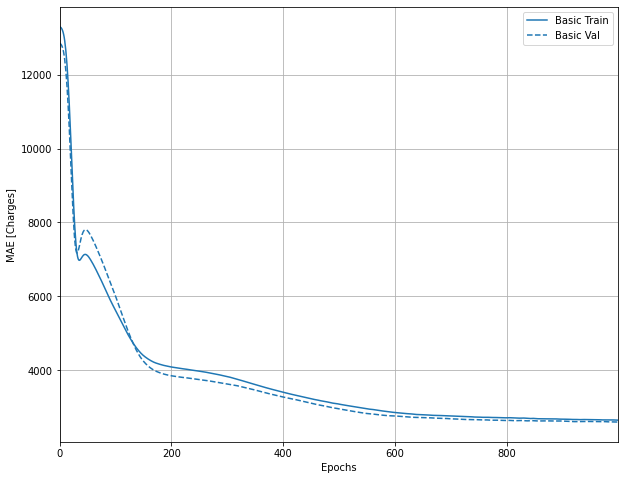

In [45]:
plt.figure(figsize=(10, 8))

plotter.plot({'Basic': training_hist}, metric = "mae")

plt.ylabel('MAE [Charges]')
plt.show()

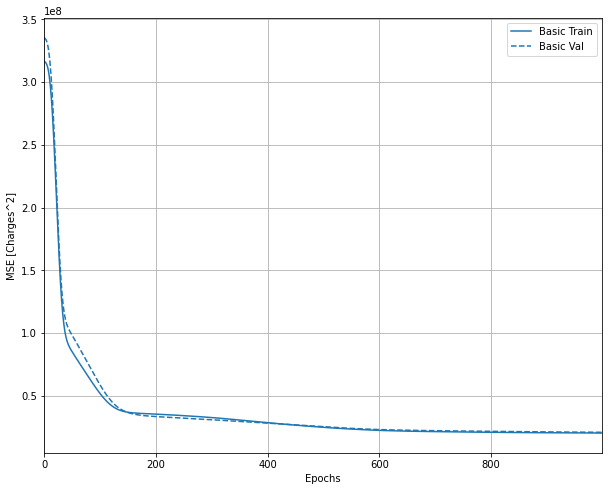

In [46]:
plt.figure(figsize=(10, 8))

plotter.plot({'Basic': training_hist}, metric = "mse")

plt.ylabel('MSE [Charges^2]')
plt.show()

### Plotting scatter plot for actual and predicted charges

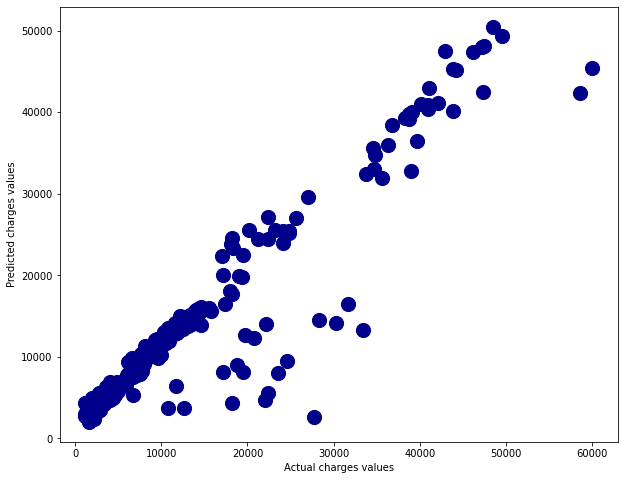

In [47]:
y_pred = model_relu_64.predict(x_test).flatten()

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred, s=200, c='darkblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')
plt.show()

In [48]:
r2_score(y_test, y_pred)

0.8749689319620145

### Building model with relu activation function

In [49]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(32, activation='elu', input_shape=[len(x_train.keys())]),
        layers.Dropout(0.2),
        layers.Dense(64, activation='elu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [50]:
model_elu_64 = build_model()

model_elu_64.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [51]:
keras.utils.plot_model(model_elu_64, 'model_elu_64_shapes.png', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### Training model (build with elu activation function and dropout)

In [52]:
training_hist= model_elu_64.fit(x_train, 
                                y_train,
                                epochs = n_epochs, 
                                validation_split = 0.2, 
                                verbose = False,
                                callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:317042592.0000,  mae:13317.2822,  mse:317042592.0000,  val_loss:336064640.0000,  val_mae:12875.8994,  val_mse:336064640.0000,  
....................................................................................................
Epoch: 100, loss:44646716.0000,  mae:4836.6826,  mse:44646716.0000,  val_loss:42054092.0000,  val_mae:4739.9707,  val_mse:42054092.0000,  
....................................................................................................
Epoch: 200, loss:32798338.0000,  mae:3888.8381,  mse:32798338.0000,  val_loss:24716924.0000,  val_mae:3125.4673,  val_mse:24716924.0000,  
....................................................................................................
Epoch: 300, loss:29631138.0000,  mae:3684.1052,  mse:29631138.0000,  val_loss:23859400.0000,  val_mae:2879.9434,  val_mse:23859400.0000,  
....................................................................................................
Epoch: 400, loss:29823102.0000,  ma

In [53]:
training_hist_df = pd.DataFrame(training_hist.history)

training_hist_df['epoch'] = training_hist.epoch

training_hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,27955602.0,3511.920166,27955602.0,22420320.0,2730.268311,22420320.0,995
996,29147196.0,3564.214355,29147196.0,22449400.0,2734.514404,22449400.0,996
997,29334138.0,3575.787354,29334138.0,22458086.0,2701.520508,22458088.0,997
998,29087064.0,3547.458008,29087064.0,22521348.0,2713.236328,22521348.0,998
999,28130754.0,3508.319336,28130754.0,22502902.0,2732.323975,22502902.0,999


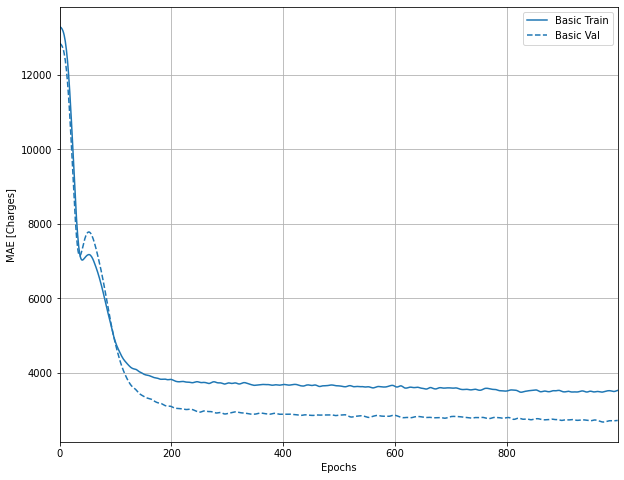

In [54]:
plt.figure(figsize=(10, 8))

plotter.plot({'Basic': training_hist}, metric = "mae")

plt.ylabel('MAE [Charges]')
plt.show()

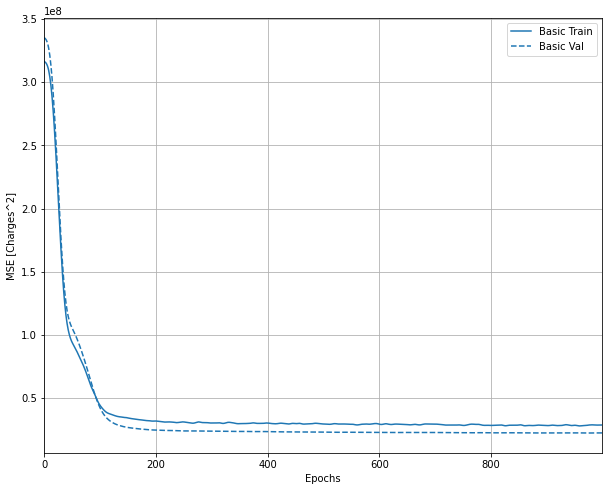

In [55]:
plt.figure(figsize=(10, 8))

plotter.plot({'Basic': training_hist}, metric = "mse")

plt.ylabel('MSE [Charges^2]')
plt.show()

In [56]:
model_elu_64.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 21641164.0000 - mae: 2797.8975 - mse: 21641164.0000


[21641164.0, 2797.8974609375, 21641164.0]

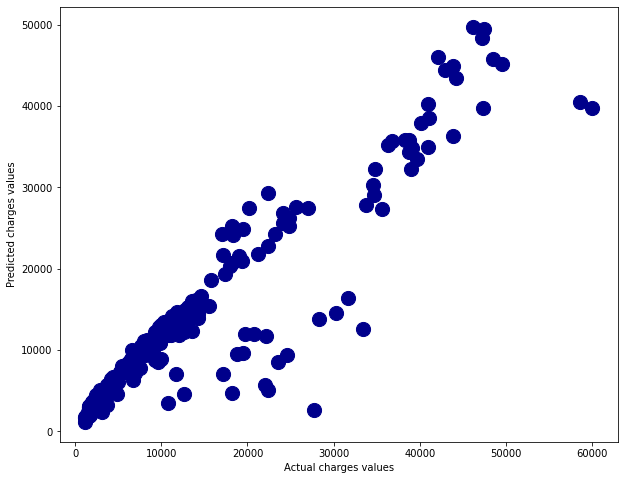

In [57]:
y_pred = model_elu_64.predict(x_test).flatten()

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred, s=200, c='darkblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')
plt.show()

In [58]:
r2_score(y_test, y_pred)

0.8550303510167689

### Building model with Earlystopping callback

In [59]:
model_relu_with_ES = build_model()

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

training_history = model_relu_with_ES.fit(x_train, 
                                       y_train, 
                                       epochs=n_epochs, 
                                       validation_split = 0.2, 
                                       verbose=False, 
                                       callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:317051232.0000,  mae:13317.6445,  mse:317051232.0000,  val_loss:336090496.0000,  val_mae:12876.8340,  val_mse:336090496.0000,  
....................................................................................................
Epoch: 100, loss:42686188.0000,  mae:4686.3579,  mse:42686188.0000,  val_loss:37830140.0000,  val_mae:4417.0801,  val_mse:37830140.0000,  
....................................................................................................
Epoch: 200, loss:31482040.0000,  mae:3795.7727,  mse:31482040.0000,  val_loss:24251010.0000,  val_mae:2985.8867,  val_mse:24251010.0000,  
.............

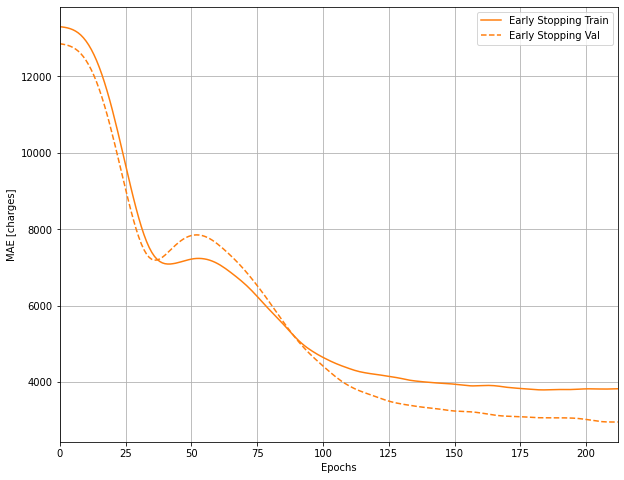

In [60]:
plt.figure(figsize=(10, 8))

plotter.plot({'Early Stopping': training_history}, metric = "mae")

plt.ylabel('MAE [charges]')
plt.show()

In [61]:
model_relu_with_ES.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 24157872.0000 - mae: 3042.0923 - mse: 24157872.0000


[24157872.0, 3042.09228515625, 24157872.0]

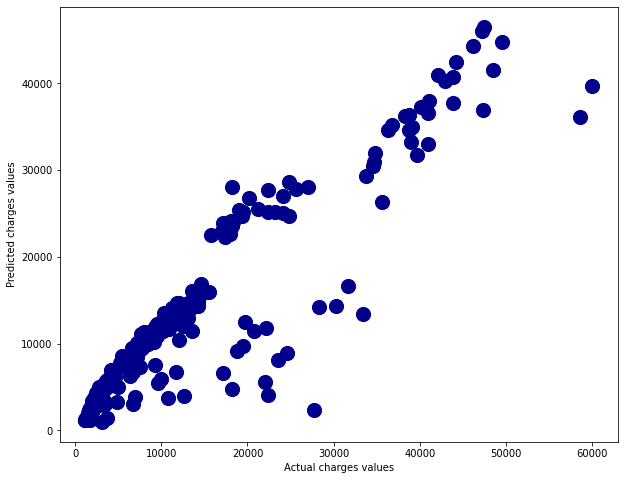

In [62]:
y_pred = model_relu_with_ES.predict(x_test).flatten()

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred, s=200, c='darkblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')
plt.show()

In [63]:
r2_score(y_test, y_pred)

0.8381714356251275

In [64]:
model_relu_with_ES.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [65]:
model_relu_with_ES.save_weights("./my_models/relu_64_weights")

In [66]:
!ls my_models/

checkpoint
relu_64_weights.data-00000-of-00001
relu_64_weights.index


In [67]:
model_relu_with_ES.save_weights("./my_models/relu_64_weights.h5", save_format="h5")

In [68]:
!ls my_models/

checkpoint
relu_64_weights.data-00000-of-00001
relu_64_weights.h5
relu_64_weights.index


In [69]:
relu_64_json = model_relu_with_ES.to_json()

pprint.pprint(json.loads(relu_64_json))

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'InputLayer',
                        'config': {'batch_input_shape': [None, 9],
                                   'dtype': 'float32',
                                   'name': 'dense_6_input',
                                   'ragged': False,
                                   'sparse': False}},
                       {'class_name': 'Dense',
                        'config': {'activation': 'elu',
                                   'activity_regularizer': None,
                                   'batch_input_shape': [None, 9],
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config': {}},
                                   'bias_regularizer': None,
                                   'dtype': 'float32',
                                   'kernel_c

In [70]:
with open('./my_models/relu_64_config.json', 'w') as outfile: 
    
    outfile.write(relu_64_json) 

In [71]:
!cat my_models/relu_64_config.json

{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 9], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_6_input"}}, {"class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "batch_input_shape": [null, 9], "dtype": "float32", "units": 32, "activation": "elu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"name": "dropout_1", "trainable": true, "dtype": "float32", "rate": 0.2, "noise_shape": null, "seed": null}}, {"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "dtype": "float32", "units": 64, "activation": "elu", "use_bias": true, "kernel_initializer": {"c

### Saving entire model

In [72]:
model_relu_with_ES.save("./my_models/relu_64_config_weights")

INFO:tensorflow:Assets written to: ./my_models/relu_64_config_weights\assets


In [71]:
!ls my_models/relu_64_config_weights 

assets         saved_model.pb variables
